# CH3 - 監督式學習(進階) 

In [1]:
# 載入常用套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3-1: 樸素貝葉斯 (Naive Bayes)

## 銀行分類範例

銀行分類範例的資料探索請參考CH2。 <br>
資料來源：https://www.kaggle.com/henriqueyamahata/bank-marketing 。

### 1. 載入資料與前處理

In [2]:
bank = pd.read_csv('dataset/bank-additional-full.csv', sep = ';') 

In [3]:
# Encoding
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder()
# 對每個欄位都做Encoding
for col in bank.columns:
    bank[col] = labelencoder.fit_transform(bank[col])
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [4]:
# 特徵變數標準化
from sklearn.preprocessing import StandardScaler
bank_scale = StandardScaler().fit_transform(bank.iloc[:,:-1]) # 不要放入y
pd.DataFrame(data=bank_scale)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.533408,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.024759,-0.567968,0.191842,-0.349494,0.192622,0.504484,0.684076,0.947396,0.456785,0.062804
1,1.629388,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.444048,-0.567968,0.191842,-0.349494,0.192622,0.504484,0.684076,0.947396,0.456785,0.062804
2,-0.290207,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,-0.121743,-0.567968,0.191842,-0.349494,0.192622,0.504484,0.684076,0.947396,0.456785,0.062804
3,-0.002267,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.435676,-0.567968,0.191842,-0.349494,0.192622,0.504484,0.684076,0.947396,0.456785,0.062804
4,1.533408,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.217304,-0.567968,0.191842,-0.349494,0.192622,0.504484,0.684076,0.947396,0.456785,0.062804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.165064,0.354824,-0.283741,0.586399,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,0.330320,-0.567968,0.191842,-0.349494,0.192622,-0.567761,1.943053,-1.728701,-1.232574,-3.196141
41184,0.573611,-0.757982,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.535423,-0.567968,0.191842,-0.349494,0.192622,-0.567761,1.943053,-1.728701,-1.232574,-3.196141
41185,1.533408,0.354824,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,-0.276617,-0.205475,0.191842,-0.349494,0.192622,-0.567761,1.943053,-1.728701,-1.232574,-3.196141
41186,0.381652,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.782384,-0.567968,0.191842,-0.349494,0.192622,-0.567761,1.943053,-1.728701,-1.232574,-3.196141


In [5]:
# 切割資料
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bank_scale, bank['y'], # x,y
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

### 2. 建立模型

#### 樸素貝葉斯參數與特徵：

+ 常見參數
    + priors：該類的先驗概率。如果指定了，則不會根據數據進行調整。
 
+ 常用模型特徵
    + class\_count\_：每個課程中觀察到的訓練樣本數。
    + class\_prior\_：每個類的機率。

+ 說明文件：https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB 。

In [6]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

### 3. 衡量績效

#### 【混淆矩陣複習】
+ 分類問題的猜測結果有四種情況：
    + 真實為1, 預測為1：True Positive, TP。
    + 真實為0, 預測為1：False Positive, FP，又稱「偽陽性」或統計學上的型一錯誤(Type I Error)。
    + 真實為1, 預測為0：False Negative, FN)，又稱「偽陰性」或統計學上的型二錯誤(Type II Error)。
    + 真實為0, 預測為0：True Negative, TN。
+ 上述四種情況通常會被畫成2x2的矩陣，又稱為「混淆矩陣(Confusion Matrix)」。
+ 而分類指標的計算就圍繞著這個矩陣進行不同角度的計算(詳細請參考CH5)。
+ 通常商業決策會將混淆矩陣衍生出的指標，搭配兩種猜錯情況所造成的「成本」一併考慮，因此沒有一定要使用哪種指標。

In [7]:
# 載入分類模型的衡量指標套件
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
# 印出混淆矩陣
cm = confusion_matrix(y_test, pred)
pd.DataFrame({'預測為0': cm[:,0], '預測為1': cm[:,1]}, index=['真實為0','真實為1']) 

,預測為0,預測為1
真實為0,9643,1348
真實為1,555,811


In [8]:
# 印出常見指標的分數
fpr, tpr, thresholds = roc_curve(y_test, pred) 
pd.DataFrame({'Accuracy': accuracy_score(y_test, pred), 'AUC': auc(fpr, tpr), 'Precision': precision_score(y_test, pred), 'Recall': recall_score(y_test, pred), 'F1': f1_score(y_test, pred), 'TPR': tpr[1], 'FNR': cm[1][0]/(cm[1][0]+cm[1][1])}, index=['value:'])

,Accuracy,AUC,Precision,Recall,F1,TPR,FNR
value:,0.845998,0.735529,0.375637,0.593704,0.460142,0.593704,0.406296


# 3-2: 支援向量機 (Support Vector Machine, SVM)

## Regressor: 紅酒品質範例

資料來源：https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 。
參考範例：https://www.kaggle.com/imdevskp/red-wine-quality-classification-using-sgd 。

### 1. 載入與探索資料

For more information, read Cortez et al., 2009.

Input variables (based on physicochemical tests):

1. fixed acidity：固定酸度。
2. volatile acidity：揮發性酸度。
3. citric acid：檸檬酸。
4. residual sugar：殘留糖。
5. chlorides：氯化物。
6. free sulfur dioxide：游離二氧化硫。
7. total sulfur dioxide：總二氧化硫。
8. density：密度。
9. pH：pH值。
10. sulphates：硫酸鹽。
11. alcohol：酒精濃度。

Output variable (based on sensory data):

12 - quality (score between 0 and 10)：紅酒品質。

In [9]:
wine = pd.read_csv('dataset/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


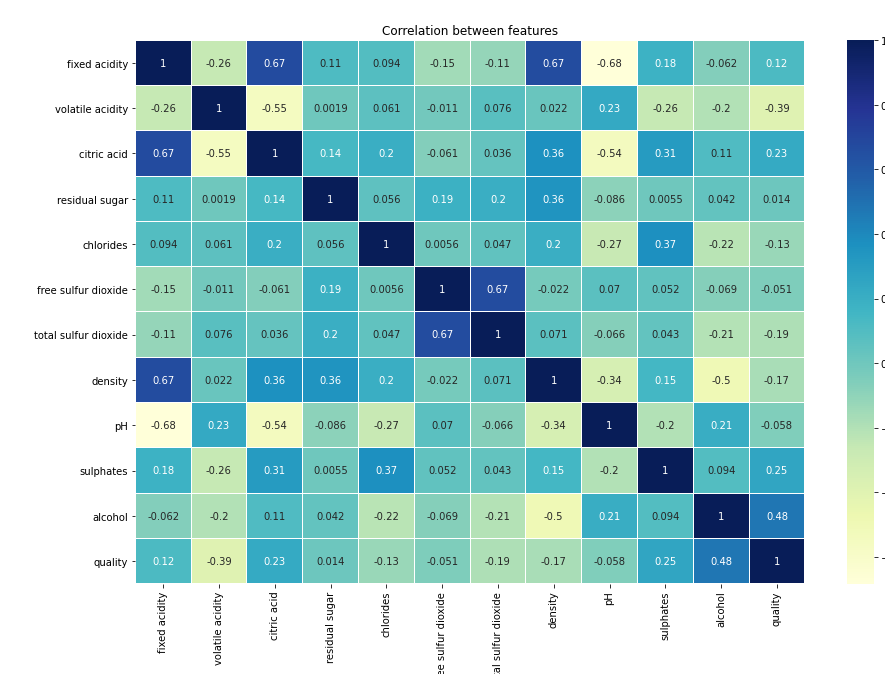

In [11]:
plt.figure(figsize=(15, 10))
sns.heatmap(wine.corr(), linewidths=0.01, cmap='YlGnBu',linecolor="white", annot=True)
plt.title('Correlation between features')
plt.show()

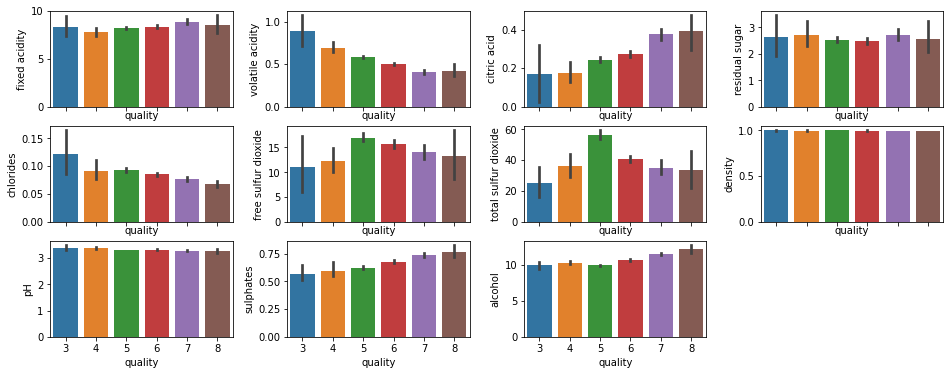

In [12]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (16, 6), sharex=True)
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine, ax = axes[0][0])
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine, ax = axes[0][1])
sns.barplot(x = 'quality', y = 'citric acid', data = wine, ax = axes[0][2])
sns.barplot(x = 'quality', y = 'residual sugar', data = wine, ax = axes[0][3])
sns.barplot(x = 'quality', y = 'chlorides', data = wine, ax = axes[1][0])
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine, ax = axes[1][1])
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine, ax = axes[1][2])
sns.barplot(x = 'quality', y = 'density', data = wine, ax = axes[1][3])
sns.barplot(x = 'quality', y = 'pH', data = wine, ax = axes[2][0])
sns.barplot(x = 'quality', y = 'sulphates', data = wine, ax = axes[2][1])
sns.barplot(x = 'quality', y = 'alcohol', data = wine, ax = axes[2][2])
fig.delaxes(axes[2,3])
plt.subplots_adjust(wspace=0.3)
plt.show()


### 2. 資料前處理

In [13]:
# 對x做標準化
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(wine.iloc[:,:-1])

In [14]:
# 切割資料
x_train, x_test, y_train, y_test = train_test_split(x, wine['quality'], # x,y
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

### 3. 建立模型與績效評估

#### SVR(SVM的迴歸)參數與特徵：

+ 常見參數
    + kernel：有五種核函數可選(‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’)，默認為’rbf’。
    + degree：若選擇‘poly’作為核函數，則可設定此參數。
    + gamma：核函數(‘rbf’, ‘poly’ 和 ‘sigmoid’)的核係數。
    + tol：Early Stopping的控制項，告訴優化算法何時停止；如果tol的值太大，則算法會在收斂之前停止。
    + C：L2正規化強度（係數λ）的倒數。
        + 必須是大於0的浮點數。與SVM一樣，較小的值代表更強的正規化，通常默認為1。

+ 說明文件：https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html 。

模型一：使用線性的核函數

In [15]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model = SVR(kernel='linear') # 可換核函數
model.fit(x_train, y_train)
pred = model.predict(x_test)

pd.DataFrame({'R-square': r2_score(y_test, pred), 'MAE': mean_absolute_error(y_test, pred), 'MSE': mean_squared_error(y_test, pred), 'RMSE': mean_squared_error(y_test, pred, squared=False)}, index=['value'])

,R-square,MAE,MSE,RMSE
value,0.333172,0.485931,0.410273,0.640525


模型二：使用非線性的核函數

In [16]:
model = SVR(kernel='rbf') # 可換核函數
model.fit(x_train, y_train)
pred = model.predict(x_test)

pd.DataFrame({'R-square': r2_score(y_test, pred), 'MAE': mean_absolute_error(y_test, pred), 'MSE': mean_squared_error(y_test, pred), 'RMSE': mean_squared_error(y_test, pred, squared=False)}, index=['value'])

,R-square,MAE,MSE,RMSE
value,0.418997,0.444311,0.357468,0.597886


+ 我們發現使用regressor的預測效果不佳(最高才42%)。
+ 推測可能是資料集太小(共1599筆)、訓練樣本數不足以讓模型精確抓出紅酒品質10個連續度量之間的差異(quality:0~10)。
+ 此時可以嘗試將問題簡化：把預測紅酒品質從0~10等級的「連續問題」，看成品質為好/壞的二元「分類問題」。

## Classifier: 紅酒品質範例

### 1. 資料前處理

In [17]:
wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

從上面的敘述性統計，我們得知資料集中的紅酒品質最小值為3、最大值為8、中位數為6且標準差約為1。<br>
因此我們決定將紅酒的好壞標準切割在6.5以上為好酒、以下為壞酒。

In [18]:
bins = (2, 6.5, 8) # 定義好/壞的分割點，若品質為(2,6.5]之間則為bad，(6.5,8]為good
group_names = ['bad', 'good'] # 設定標籤名稱
y = pd.cut(wine['quality'], bins = bins, labels = group_names) # 使用pandas的cut函數可以依照bins的設定做切割
y.value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [19]:
# 進行編碼
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

### 2. 建立模型與績效評估

#### SVC(SVM的分類)參數與特徵：

+ 常見參數
    + kernel：有五種核函數可選(‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’)，默認為’rbf’。
    + degree：若選擇‘poly’作為核函數，則可設定此參數。
    + gamma：核函數(‘rbf’, ‘poly’ 和 ‘sigmoid’)的核係數。
    + decision_function_shape：
        + ‘ovo’：one-vs-one，用於多類別策略。
        + ‘ovr’：one-vs-rest
    + tol：Early Stopping的控制項，告訴優化算法何時停止；如果tol的值太大，則算法會在收斂之前停止。
    + C：L2正規化強度（係數λ）的倒數。
        + 必須是大於0的浮點數。與SVM一樣，較小的值代表更強的正規化，通常默認為1。

說明文件：https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 。

模型一：使用線性的核函數 <br>
代表在原始空間直接畫一條線去區分。

In [21]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(x_train, y_train)
pred = model.predict(x_test)

# 印出常見指標的分數
fpr, tpr, thresholds = roc_curve(y_test, pred) 
pd.DataFrame({'Accuracy': accuracy_score(y_test, pred), 'AUC': auc(fpr, tpr), 'Precision': precision_score(y_test, pred), 'Recall': recall_score(y_test, pred), 'F1': f1_score(y_test, pred)}, index=['value'])

,Accuracy,AUC,Precision,Recall,F1
value,0.864583,0.5,0.0,0.0,0.0


模型二：使用非線性的核函數 <br>
將原始空間的點投射到高維空間再進行分類。

In [22]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(x_train, y_train)
pred = model.predict(x_test)

# 印出常見指標的分數
fpr, tpr, thresholds = roc_curve(y_test, pred) 
pd.DataFrame({'Accuracy': accuracy_score(y_test, pred), 'AUC': auc(fpr, tpr), 'Precision': precision_score(y_test, pred), 'Recall': recall_score(y_test, pred), 'F1': f1_score(y_test, pred)}, index=['value'])

,Accuracy,AUC,Precision,Recall,F1
value,0.89375,0.646617,0.769231,0.307692,0.43956


我們可以很明顯看到此資料集雖然在迴歸模型中僅能解釋42%，但在將問題簡化後，分類模型預測的準確率卻接近高達90%。

# 3-3: 隨機森林 (Random Forest)

## Regressor: 紅酒品質範例

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, wine['quality'], # x,y
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

隨機森林(迴歸)參數與特徵：

+ 常見參數
    + n_estimators：森林的大小。默認為100棵樹。
    + criterion：衡量分割品質的功能，方法包含：'mse'(默認),'mae'。
    + max_depth：樹的最大深度。
        + None：會將節點展開，直到所有葉子都是純淨的(pure)，或者直到所有葉子都包含少於min_samples_split個樣本。
    + min_samples_split：分割內部節點所需的最少樣本數。
    + min_samples_leaf：在葉節點處需要的最小樣本數。
    + max_features：尋找最佳分割時要考慮的特徵數量。
    + max_leaf_nodes：以最佳優先方式種植帶有max_leaf_nodes的樹，最佳節點定義為雜質的相對減少。
        + None：葉節點數不受限制。
+ 常見特徵
    + feature\_importances\_：取得特徵的重要性。
    
說明文件：https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 。

In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) # 決定要幾棵樹
model.fit(x_train, y_train)
pred = model.predict(x_test)

pd.DataFrame({'R-square': r2_score(y_test, pred), 'MAE': mean_absolute_error(y_test, pred), 'MSE': mean_squared_error(y_test, pred), 'RMSE': mean_squared_error(y_test, pred, squared=False)}, index=['value'])

,R-square,MAE,MSE,RMSE
value,0.490039,0.409562,0.313759,0.560142


## Classifier: 鐵達尼號生存範例

參考資料：https://www.kaggle.com/jhyoocoder/a-journey-through-titanic 。

### 1. 資料前處理

In [25]:
# 進行網路協定設定
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# 載入資料
url = "https://kaggle-getting-started.s3-ap-northeast-1.amazonaws.com/titanic/train.csv" 
titanic = pd.read_csv(url)
# 填補NA
titanic["Age"].fillna(titanic["Age"].median(skipna=True), inplace=True)
titanic["Embarked"].fillna("S", inplace=True)
# 合併變數
titanic['TravelAlone']=np.where((titanic["SibSp"]+titanic["Parch"])>0, 0, 1) # np.where(規則, if符合條件則執行以下動作, else則執行以下動作)
# 丟棄變數
titanic.drop('Cabin', axis=1, inplace=True)
titanic.drop('SibSp', axis=1, inplace=True) 
titanic.drop('Parch', axis=1, inplace=True)
titanic.drop('PassengerId', axis=1, inplace=True) 
titanic.drop('Name', axis=1, inplace=True)
titanic.drop('Ticket', axis=1, inplace=True) 
# Encoding
labelencoder = LabelEncoder() 
titanic['Sex'] = labelencoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = labelencoder.fit_transform(titanic['Embarked']) 
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,22.0,7.2500,2,0
1,1,1,0,38.0,71.2833,0,0
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,0
4,0,3,1,35.0,8.0500,2,1
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,1
887,1,1,0,19.0,30.0000,2,1
888,0,3,0,28.0,23.4500,2,0
889,1,1,1,26.0,30.0000,0,1


In [26]:
x_train, x_test, y_train, y_test = train_test_split(titanic.iloc[:,1:], titanic['Survived'], # x,y
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

### 2. 建立模型與績效評估

隨機森林(分類)參數與特徵：

+ 常見參數
    + n_estimators：森林的大小。默認為100棵樹。
    + criterion：衡量分割品質的功能，方法包含：'mse'(默認),'mae'。
    + max_depth：樹的最大深度。
        + None：會將節點展開，直到所有葉子都是純淨的(pure)，或者直到所有葉子都包含少於min_samples_split個樣本。
    + min_samples_split：分割內部節點所需的最少樣本數。
    + min_samples_leaf：在葉節點處需要的最小樣本數。
    + max_features：尋找最佳分割時要考慮的特徵數量。
    + max_leaf_nodes：以最佳優先方式種植帶有max_leaf_nodes的樹，最佳節點定義為雜質的相對減少。
        + None：葉節點數不受限制。
+ 常見特徵
    + feature\_importances\_：取得特徵的重要性。
    

+ 細節參考文件：https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 。

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

cm = confusion_matrix(y_test, pred)         # 混淆矩陣
fpr, tpr, thresholds = roc_curve(y_test, pred)    
pd.DataFrame({'Accuracy': accuracy_score(y_test, pred), 'AUC': auc(fpr, tpr), 'Precision': precision_score(y_test, pred), 'Recall': recall_score(y_test, pred), 'F1': f1_score(y_test, pred), 'TPR': tpr[1], 'FNR': cm[1][0]/(cm[1][0]+cm[1][1])}, index=['values:'])

,Accuracy,AUC,Precision,Recall,F1,TPR,FNR
values:,0.794776,0.782259,0.735294,0.728155,0.731707,0.728155,0.271845


# 3-4: 極限梯度提升 (eXtreme Gradient Boosting, XGBoost, XGB)

極限梯度提升並非sklearn內建的模型，可以靠以下參數設定要做迴歸還是分類。

+ objective：設定為迴歸或分類的方法。
    + 'reg:squarederror'：平方誤差迴歸。
    + 'binary:logistic'：二元分類，使用羅吉斯迴歸，輸出機率。
    + 'multi:softmax'：多元分類，使用softmax，輸出機率，還需要設定有幾類(num_class)。

+ 細節參考文件：https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters 。

## Regressor: 紅酒品質範例

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

In [29]:
import xgboost as xgb

model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(x_train, y_train)
pred = model.predict(x_test)

pd.DataFrame({'R-square': r2_score(y_test, pred), 'MAE': mean_absolute_error(y_test, pred), 'MSE': mean_squared_error(y_test, pred), 'RMSE': mean_squared_error(y_test, pred, squared=False)}, index=['value'])

,R-square,MAE,MSE,RMSE
value,0.398846,0.136146,0.070382,0.265297


## Classifier: 鐵達尼號生存範例

In [30]:
x_train, x_test, y_train, y_test = train_test_split(titanic.iloc[:,1:], titanic['Survived'], # x,y
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

In [31]:
model = xgb.XGBClassifier(objective="binary:logistic") # Binary classification
model.fit(x_train, y_train)
pred = model.predict(x_test)

fpr, tpr, thresholds = roc_curve(y_test, pred)    
pd.DataFrame({'Accuracy': accuracy_score(y_test, pred), 'AUC': auc(fpr, tpr), 'Precision': precision_score(y_test, pred), 'Recall': recall_score(y_test, pred), 'F1': f1_score(y_test, pred), 'TPR': tpr[1], 'FNR': cm[1][0]/(cm[1][0]+cm[1][1])}, index=['values:'])

,Accuracy,AUC,Precision,Recall,F1,TPR,FNR
values:,0.791045,0.771933,0.747368,0.68932,0.717172,0.68932,0.271845


# 3-5: 模型優化
## 1. 交叉驗證(Cross Validation)

### Regressor

In [32]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2021) # 紅酒品質連續資料
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=2021)
scores = cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=5) # 做5-fold的交叉驗證 # 使用MSE做績效衡量

print("Each MSE of the cv split is: ", -scores) # sklearn.model_selection套件回傳的MSE為負數，轉正後即為正確的值
print('Average MSE from 5 cv splits is: ', round(-scores.mean(), 4))

Each MSE of the cv split is:  [0.08341954 0.11222542 0.08694242 0.09092892 0.09525234]
Average MSE from 5 cv splits is:  0.0938


可以看到五次驗證的結果MSE誤差有小(0.08)也有大(0.11)。<br>
假如我們不做交叉驗證、只用一般的資料分割結果來訓練模型，這時又剛好使用的驗證子集是誤差很小的，我們就會以為我們的模型表現非常好；真正當測試資料進來時才發現模型不如預期，就為時已晚。<br>
而將五次驗證做平均的結果，才是這個模型的平均應有的表現。

### Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier 

x_train, x_test, y_train, y_test = train_test_split(titanic.iloc[:,1:], titanic['Survived'], # 鐵達尼分類資料
                                                    test_size=0.3, random_state=2021)
model = KNeighborsClassifier()  
model.fit(x_train, y_train)  
print('未做交叉驗證的準確率(參考基準): ', round(model.score(x_train, y_train), 4))   

# 交叉驗證  
scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy') # 使用準確率來做績效衡量
print('10-folds 驗證的平均準確率: ', round(scores.mean(), 4)) 

未做交叉驗證的準確率(參考基準):  0.801
10-folds 驗證的平均準確率:  0.6919


### 更精密的交叉驗證方法

cross_val_score()中的'cv'參數能指定使用不同的交叉驗證方法，默認為KFold()。

1. 直接輸入數字會執行K-fold驗證，「按資料順序」去分成K等分。
    + 例如：cv=10 即等同於 KFold(10)。
2. LeaveOneOut()：執行Leave-one-out驗證。
    + 例如：loout = LeaveOneOut(), cv = loout。
3. ShuffleSplit()：在 KFold() 的基礎下加入隨機排序，將樣本隨機打散後平均劃分。
    + 例如：shufspl = ShuffleSplit(train_size=0.7, test_size=0.3, n_splits=8, random_state = 2021), cv = shufspl。

ShuffleSplit在K-fold上又加上了隨機分割，看似合理公平、效果更好；然而，在資料不均等的情況下該作法會有失平衡。<br>
假設資料中有3個類別，但是每個類別的數量非常不均等，資料筆數分別為1:3:1；這樣，使用上述方法就會依照3類別平均分成1:1:1，造成驗證結果不佳。<br>
為了改善這個問題，又出現了以下方法：

4. StratifiedKFold()：在 KFold()的基礎下加入考慮類別的分層。
5. StratifiedShuffleSplit()：在 StratifiedKFold()的基礎下加入隨機排序，將樣本隨機打散後平均劃分。

In [34]:
from sklearn.model_selection import StratifiedKFold

model = KNeighborsClassifier()
strKFold = StratifiedKFold(n_splits=3,shuffle=False,random_state=2021)
scores = cross_val_score(model, x_train, y_train, cv=strKFold)
print("Straitified cv scores: {}".format(scores))
print("Average score of straitified cv: {:.4f}".format(scores.mean()))

Straitified cv scores: [0.66826923 0.68269231 0.66183575]
Average score of straitified cv: 0.6709


#### 直接以 ShuffleSplit() 來替代 train_test_split()：

In [35]:
from sklearn.model_selection import ShuffleSplit

kfold = ShuffleSplit(n_splits=3, test_size=0.3, random_state=2021)

scores = []

for train_index, test_index in kfold.split(x,y):   # x, y 為紅酒品質資料
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = xgb.XGBRegressor(objective="reg:squarederror")
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    scores.append(mean_squared_error(y_test, pred))
    
print("Each MSE of the cv split is: ", scores) 
print('Average MSE from 3 cv splits is: ', round((sum(scores) / len(scores)), 4))

Each MSE of the cv split is:  [0.07038246925766804, 0.08506707204071126, 0.06801053094003688]
Average MSE from 3 cv splits is:  0.0745


### 交叉驗證搭配參數調校(Hyperparameters Tuning)

注意！交叉驗證實際上並不會提高我們模型的準確性，它只是能以更全面的角度估計(分割成不同子集來多次驗證)，平均而言，模型的準確性能到達多高？<br>
因此我們需要搭配參數組合，去找出能獲得最高準確率的模型參數設定，再依據該參數建立最終模型。

參考範例：https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn 。

#### 尋找最佳K值

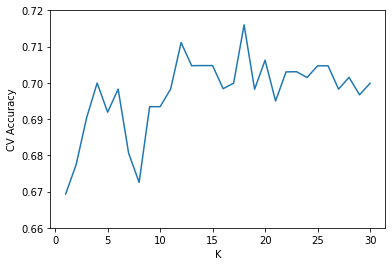

k = 17 has the highest acc: 0.716


In [36]:
x_train, x_test, y_train, y_test = train_test_split(titanic.iloc[:,1:], titanic['Survived'], # 鐵達尼分類資料
                                                    test_size=0.3, random_state=2021)

# 透過loop計算不同K值對模型的影響，返回交叉驗證後的平均準確率
k_range = range(1, 31)  
k_scores = []

for k in k_range:  
    model = KNeighborsClassifier(n_neighbors=k)  
    scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')  
    k_scores.append(scores.mean())  

# 畫圖
plt.plot(k_range, k_scores)  
plt.xlabel('K')  
plt.ylabel('CV Accuracy')  
plt.ylim(0.66, 0.72)
plt.show()  
print(f'k = {k_scores.index(max(k_scores))} has the highest acc: {round(max(k_scores),4)}')

從圖中可以得知，選擇k值為17最好(ACC=0.716)。

#### Grid Search
當要tunning的參數不只一個時，我們可以用格點搜尋法來一次找不同參數搭配組合。

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [10, 20, 30, 50],
          'max_leaf_nodes': list(range(2, 100)), 
          'min_samples_split': [2, 3, 4]}
model = GridSearchCV(DecisionTreeClassifier(random_state=2021), param_grid=params, verbose=0, scoring='accuracy', cv=3)
model.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'max_depth': [10, 20, 30, 50],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [38]:
model.best_params_

{'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_split': 2}

找出了最佳參數後，我們把此組合套入最終模型：

In [39]:
model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, min_samples_split=2)
model.fit(x_train, y_train)
pred = model.predict(x_test)

fpr, tpr, thresholds = roc_curve(y_test, pred)    
pd.DataFrame({'Accuracy': accuracy_score(y_test, pred), 'AUC': auc(fpr, tpr), 'Precision': precision_score(y_test, pred), 'Recall': recall_score(y_test, pred), 'F1': f1_score(y_test, pred), 'TPR': tpr[1], 'FNR': cm[1][0]/(cm[1][0]+cm[1][1])}, index=['values:'])

,Accuracy,AUC,Precision,Recall,F1,TPR,FNR
values:,0.80597,0.778582,0.8,0.660194,0.723404,0.660194,0.271845


#### Randomized Search

在面對大資料集和多參數的情況下，Grid Search要將所有組合都跑過一遍，非常耗時。<br>
這時，我們可以採用RandomizedSearchCV進行隨機參數挑選搜尋的方法。

In [40]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2021) # 紅酒品質連續資料

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # 默認為0.1 
    "max_depth": randint(2, 6),          # 默認為3
    "n_estimators": randint(100, 150),   # 默認為100
    "subsample": uniform(0.6, 0.4)
}

model = RandomizedSearchCV(xgb.XGBRegressor(), param_distributions=params, random_state=2021, n_iter=200, cv=10, verbose=1, n_jobs=1, return_train_score=True)
model.fit(x_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  4.0min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa400c5a588>,
                                        'max_depth': <scipy.st

In [41]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
report_best_scores(model.cv_results_, 1)

Model with rank: 1
Mean validation score: 0.327 (std: 0.098)
Parameters: {'colsample_bytree': 0.7844489144847503, 'gamma': 0.09331570545111956, 'learning_rate': 0.03818509316092057, 'max_depth': 5, 'n_estimators': 123, 'subsample': 0.8237086699482129}



## 2. Early stopping 策略

+ 設定在model.fit裡面
+ 如果給多個評估指標，則會使用最後一個指標做Early Stop
+ early_stopping_rounds：設定模型若在後面幾輪都沒有進步則停止訓練

In [42]:
x_train, x_test, y_train, y_test = train_test_split(titanic.iloc[:,1:], titanic['Survived'], # 鐵達尼分類資料
                                                    test_size=0.3, random_state=2021)

model = xgb.XGBClassifier(objective="binary:logistic", random_state=2021, eval_metric="auc")
model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)])
pred = model.predict(x_test)

print(f'The ACC of the model is: {round(accuracy_score(y_test, pred), 4)}')

[0]	validation_0-auc:0.84375
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.83789
[2]	validation_0-auc:0.84907
[3]	validation_0-auc:0.85487
[4]	validation_0-auc:0.85711
[5]	validation_0-auc:0.85281
[6]	validation_0-auc:0.85190
[7]	validation_0-auc:0.85266
[8]	validation_0-auc:0.85354
[9]	validation_0-auc:0.85125
Stopping. Best iteration:
[4]	validation_0-auc:0.85711

The ACC of the model is: 0.8172


In [43]:
print("Stopping at best score: {0}, best iteration: {1}, best ntree limit {2}".format(model.best_score, model.best_iteration, model.best_ntree_limit))

Stopping at best score: 0.857105, best iteration: 4, best ntree limit 5
